# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: MLOps**

### Tecnológico de Monterrey

## **Fase 1 - Avance de proyecto - Equipo 7**
### **Problema de asignación de créditos: South German Dataset.**

### Dante Cesar Cervantes Gutierrez - A01794585 
### Luis Angel Benitez Ortega - A01795165
### Ignacio Jose Aguilar Garcia - A00819762
### Alan Jasso Arenas - A01383272 
### Andrea Jelena Ramírez García - A01733905 

## **Estructuración y Refactorización del Código**

## Setup

In [33]:
# Setup: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, 
                             confusion_matrix, roc_auc_score, roc_curve)
import yaml

# Setup: ConfigLoader Class for Loading Configurations
class ConfigLoader:
    def __init__(self, config_path):
        self.config_path = config_path
        self.config = self.load_config()
    
    def load_config(self):
        with open(self.config_path, 'r') as conf_file:
            return yaml.safe_load(conf_file)


## Creating the classes

### Data Explorer

In [34]:
class DataExplorer:
    def __init__(self, config):
        self.config = config
        self.df = None  # Initialize df as None

    def load_data(self):
        self.df = pd.read_csv(self.config['data_load']['dataToModel'])
        return self.df

    def data_summary(self):
        print("Data Head:")
        print(self.df.head())
        
        print("\nData Info:")
        print(self.df.info())
        
        print("\nData Description:")
        print(self.df.describe())

    def plot_histogram(self):
        print("\nPlotting Histograms for Numerical Features...")
        self.df.hist(bins=20, figsize=(10, 12))
        plt.show()

    def plot_correlation(self):
        print("\nPlotting Correlation Matrix...")
        plt.figure(figsize=(10, 8))
        correlation_matrix = self.df.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Matrix")
        plt.show()





### Quality Model

In [35]:
# Quality Model: Preprocessor for Data Preprocessing
class Preprocessor:
    def __init__(self, num_features, nom_features, ord_features):
        self.num_features = num_features
        self.nom_features = nom_features
        self.ord_features = ord_features
        self.pipeline = self.create_pipeline()

    def create_pipeline(self):
        num_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler(feature_range=(1, 2)))
        ])

        catImp_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent'))
        ])

        catOHE_pipeline = Pipeline(steps=[
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', num_pipeline, self.num_features),
                ('ord', catImp_pipeline, self.ord_features),
                ('cat', catOHE_pipeline, self.nom_features)
            ],
            remainder='passthrough'
        )
        return preprocessor


In [36]:
# Quality Model: ModelTrainer for Model Training and Validation
class ModelTrainer:
    def __init__(self, preprocessor):
        self.preprocessor = preprocessor

    def create_pipeline(self):
        pipeline = Pipeline(steps=[
            ('preprocessor', self.preprocessor),
            ('classifier', SVC(probability=True, random_state=0))
        ])
        return pipeline

    def perform_grid_search(self, X_train, y_train, param_grid, cv=5):
        pipeline = self.create_pipeline()
        grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=cv)
        grid_search.fit(X_train, y_train)
        return grid_search.best_estimator_, grid_search.best_params_


In [37]:
# Quality Model: Evaluator for Model Evaluation
class Evaluator:
    def __init__(self, model):
        self.model = model
    
    def calculate_metrics(self, y_true, y_pred):
        return {
            'accuracy': accuracy_score(y_true, y_pred),
            'f1': f1_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred),
            'recall': recall_score(y_true, y_pred)
        }
    
    def plot_confusion_matrix(self, y_test, y_test_pred):
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=True,
                    xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix (Percentage)')
        plt.show()

    def plot_roc_curve(self, X_test, y_test):
        scores_val = self.model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, scores_val)
        auc = roc_auc_score(y_test, scores_val)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()


## Executing the code

Data Head:
   status  duration  credit_history  purpose    amount   savings  \
0       1        18               4        2  6.956545  0.693147   
1       1         8               4        0  8.131237  0.693147   
2       2        24               2        3  8.231908  1.386294   
3       1        30               4        1  8.730367  1.098612   
4       1         6               4        3  7.579679  0.693147   

   employment_duration  installment_rate  personal_status_sex  \
0                    2                 4                    2   
1                    4                 1                    3   
2                    1                 1                    2   
3                    4                 1                    4   
4                    4                 1                    2   

   present_residence  property  age  housing  number_credits  job  telephone  \
0                  4         2   21        1        0.693147    3          1   
1                  4         

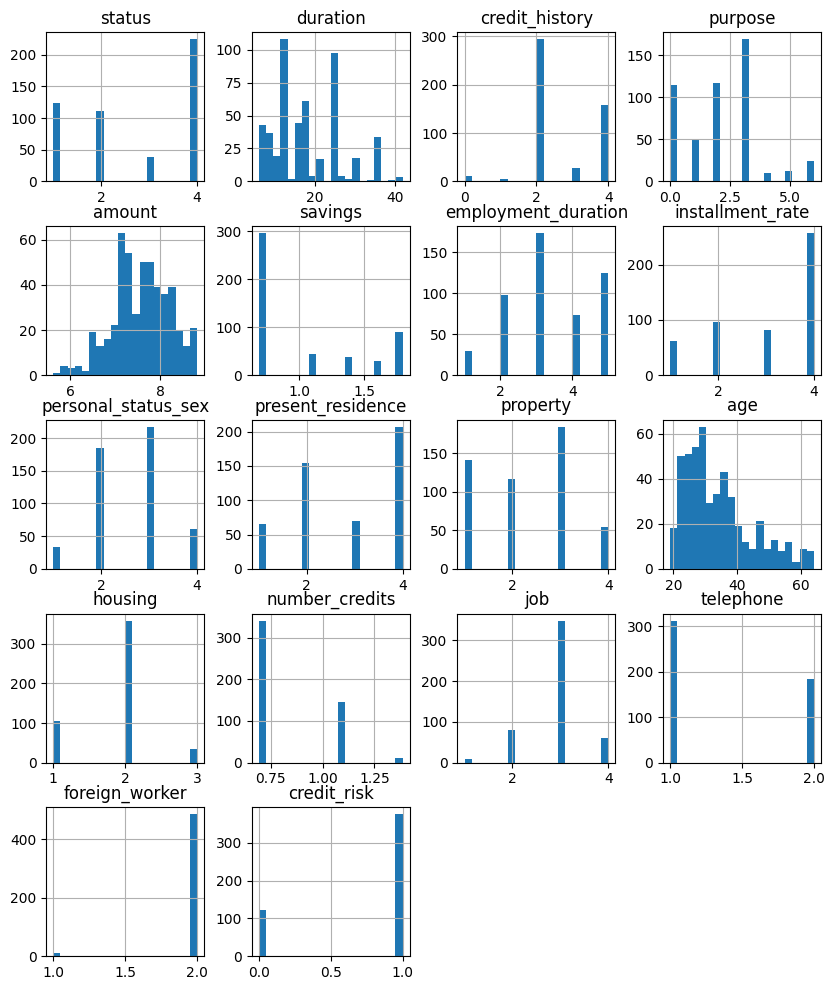


Plotting Correlation Matrix...


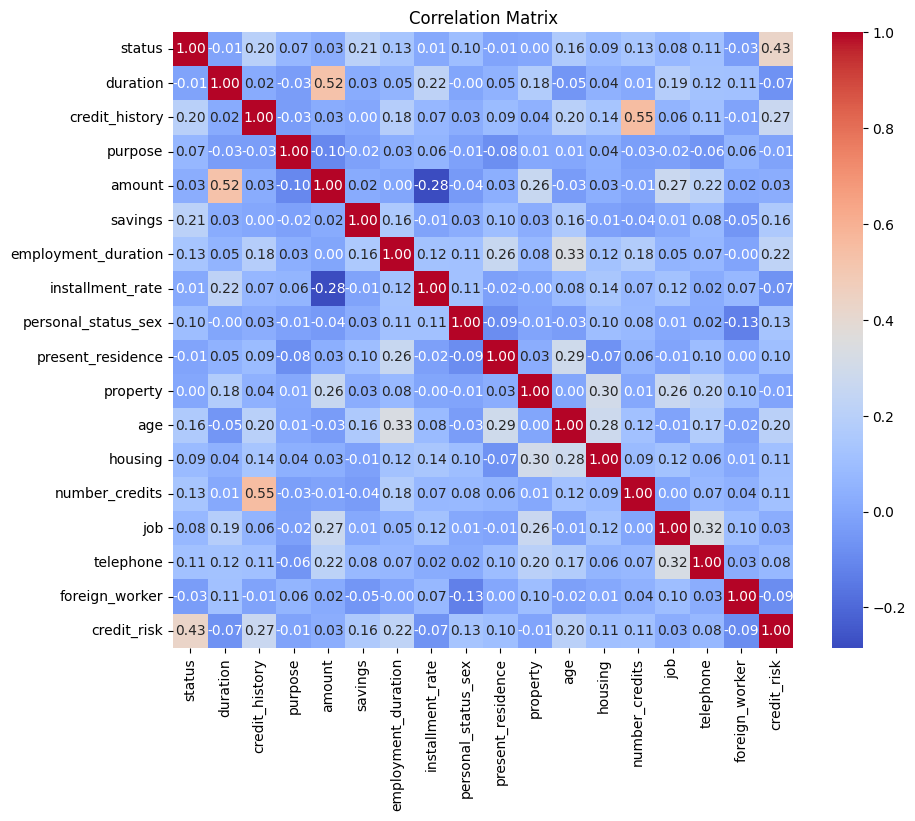

Best Hyperparameters: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'linear'}
Train Metrics: {'accuracy': 0.8484848484848485, 'f1': 0.9047619047619048, 'precision': 0.8742331288343558, 'recall': 0.9375}
Validation Metrics: {'accuracy': 0.73, 'f1': 0.8163265306122449, 'precision': 0.7894736842105263, 'recall': 0.8450704225352113}


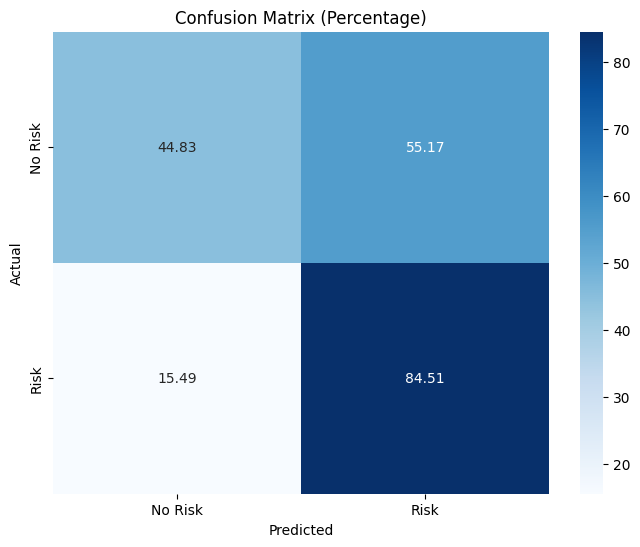

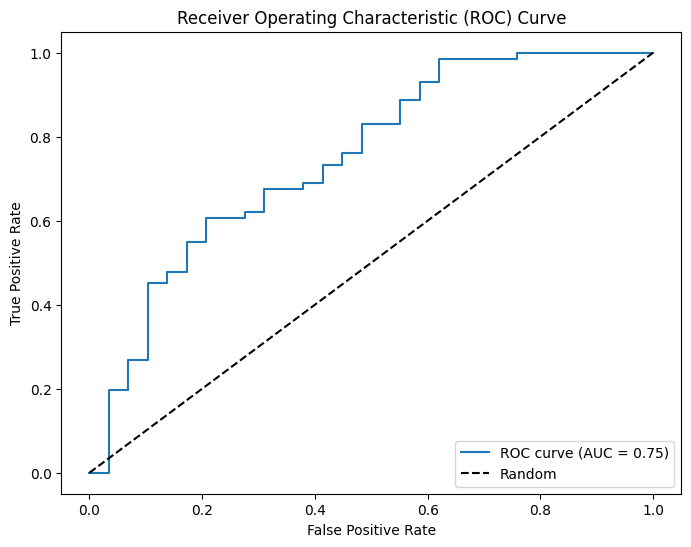

In [38]:
def main():
    # Load config
    config_loader = ConfigLoader('../../params.yaml')
    config = config_loader.config
    
    # Load data and explore it
    data_explorer = DataExplorer(config)
    df = data_explorer.load_data()

    # Explore the data
    data_explorer.data_summary()  # No need to pass df
    data_explorer.plot_histogram()  # No need to pass df
    data_explorer.plot_correlation()  # No need to pass df

    # Split data
    X = df.drop(['credit_risk'], axis=1)
    y = df['credit_risk']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define preprocessing and model parameters
    num_features = ["duration", "amount", "age"]
    nom_features = ["status", "credit_history", "purpose", "savings", "personal_status_sex", "housing"]
    ord_features = ["employment_duration", "installment_rate", "present_residence", "property", "number_credits", "job"]
    
    # Initialize Preprocessor
    preprocessor = Preprocessor(num_features, nom_features, ord_features)
    
    # Model training
    param_grid = {
        'classifier__C': [0.1, 1, 10, 100, 1000],
        'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
        'classifier__gamma': [0.1, 1, 10, 100]
    }
    
    model_trainer = ModelTrainer(preprocessor.pipeline)
    best_model, best_params = model_trainer.perform_grid_search(X_train, y_train, param_grid)
    
    # Evaluate model
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    evaluator = Evaluator(best_model)
    train_metrics = evaluator.calculate_metrics(y_train, y_train_pred)
    test_metrics = evaluator.calculate_metrics(y_test, y_test_pred)
    
    print(f"Best Hyperparameters: {best_params}")
    print(f"Train Metrics: {train_metrics}")
    print(f"Validation Metrics: {test_metrics}")
    
    # Plot evaluation results
    evaluator.plot_confusion_matrix(y_test, y_test_pred)
    evaluator.plot_roc_curve(X_test, y_test)

# Entry point for execution
if __name__ == '__main__':
    main()

